In [3]:
# import the necessary packages
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import os
from tensorflow.keras.utils import plot_model
from keras import backend as K
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import load_model
import sklearn.metrics as metrics
import seaborn as sns

In [2]:
pip install seaborn

     -------------------------------------- 293.3/293.3 kB 9.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [69]:
#masked images
images=os.listdir("facedata/1")
masked=np.ones( len(os.listdir("facedata/1")))
not_masked=np.zeros(len(os.listdir("facedata/1")))


images=np.append(images,os.listdir("facedata/0"))
masked=np.append(masked,np.zeros(len(os.listdir("facedata/0"))))
not_masked=np.append(not_masked,np.ones( len(os.listdir("facedata/0"))))



np.array([images,masked,not_masked])

array([['Aug_0_1572.png', 'Aug_0_230.png', 'Aug_0_2802.png', ...,
        'Aug_333_487.png', 'Aug_333_5276.png', 'Aug_333_5329.png'],
       ['1.0', '1.0', '1.0', ..., '0.0', '0.0', '0.0'],
       ['0.0', '0.0', '0.0', ..., '1.0', '1.0', '1.0']], dtype='<U32')

In [70]:
import pandas as pd

data={'image':images, 'masked':masked,'not_masked':not_masked}

df = pd.DataFrame(data, columns = ['image', 'masked','not_masked'])

In [71]:
df['image'].iloc[:len(os.listdir("facedata/1"))]="facedata/0/"+ df['image'].iloc[:len(os.listdir("facedata/1"))]

C:\Users\rajat\AppData\Local\Temp\ipykernel_20152\2543263489.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['image'].iloc[:len(os.listdir("facedata/1"))]="facedata/0/"+ df['image'].iloc[:len(os.listdir("facedata/1"))]


In [73]:
df['image'].iloc[len(os.listdir("facedata/1")):]="facedata/1"+df['image'].iloc[len(os.listdir("facedata/1")):]

C:\Users\rajat\AppData\Local\Temp\ipykernel_20152\1774016047.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['image'].iloc[len(os.listdir("facedata/1")):]="facedata/1"+df['image'].iloc[len(os.listdir("facedata/1")):]


In [74]:
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import array_to_img,img_to_array,load_img,save_img

In [75]:
df['image'].iloc[4]

'facedata/0/Aug_0_4001.png'

In [76]:
from sklearn.utils import shuffle
df = shuffle(df)

In [77]:
df.tail()

,image,masked,not_masked
997,facedata/1dataset/1Aug_326_8121.png,0.0,1.0
797,facedata/1dataset/1Aug_315_5702.png,0.0,1.0
54,facedata/0/Aug_17_2074.png,1.0,0.0
1046,facedata/1dataset/1Aug_329_3982.png,0.0,1.0
407,facedata/0/Aug_66_7125.png,1.0,0.0


In [78]:
len(df)

1120

In [79]:
df.shape

(1120, 3)

In [80]:
train=df.iloc[:int(len(df) *0.70)]
test_img=df.iloc[int(len(df) *0.70):int(len(df) *0.90)]
val=df.iloc[int(len(df) *0.90):]

In [81]:
import keras
train_datagen = keras.preprocessing.image.ImageDataGenerator(rescale = 1./255,
                                                             rotation_range=20,
                                                             zoom_range=0.15,
                                                             width_shift_range=0.2,
                                                             height_shift_range=0.2,
                                                             shear_range=0.15,
                                                             horizontal_flip=True,
                                                             fill_mode="nearest")

train_generator = train_datagen.flow_from_dataframe(train,
                                                    x_col='image',
                                                    y_col=['masked', 'not_masked'],
                                                    target_size = (224,224), 
                                                    class_mode = 'raw',
                                                    batch_size = 8
                                                    
                                                   )

val_generator = train_datagen.flow_from_dataframe(val,
                                                  x_col='image',
                                                  y_col=['masked', 'not_masked'],
                                                  target_size = (224,224),
                                                  class_mode = 'raw',
                                                  batch_size = 4
                                                 
                                                  )

test_datagen = keras.preprocessing.image.ImageDataGenerator(rescale = 1./255)

test_generator = test_datagen.flow_from_dataframe(test_img,
                                                  x_col='image',
                                                  y_col=['masked', 'not_masked'],
                                                  target_size = (224,224),
                                                  class_mode = 'raw',
                                                  batch_size = 1
                                              
                                                 )

Found 0 validated image filenames.
Found 0 validated image filenames.
Found 0 validated image filenames.


C:\Users\rajat\anaconda3\envs\tensorflow_env\lib\site-packages\keras\preprocessing\image.py:1139: UserWarning: Found 784 invalid image filename(s) in x_col="image". These filename(s) will be ignored.
  warnings.warn(
C:\Users\rajat\anaconda3\envs\tensorflow_env\lib\site-packages\keras\preprocessing\image.py:1139: UserWarning: Found 112 invalid image filename(s) in x_col="image". These filename(s) will be ignored.
  warnings.warn(
C:\Users\rajat\anaconda3\envs\tensorflow_env\lib\site-packages\keras\preprocessing\image.py:1139: UserWarning: Found 224 invalid image filename(s) in x_col="image". These filename(s) will be ignored.
  warnings.warn(


In [62]:
# initialize the initial learning rate, number of epochs to train for,
# and batch size
INIT_LR = 1e-4
EPOCHS = 2
BS = 32

In [63]:
#load the MobileNetV2 network, ensuring the head FC layer sets are
# left off
baseModel = MobileNetV2(weights="imagenet", include_top=False,
	input_tensor=Input(shape=(224, 224, 3)))

In [64]:
# construct the head of the model that will be placed on top of the
# the base model
headModel = baseModel.output
headModel = AveragePooling2D(pool_size=(7, 7))(headModel)
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(128, activation="relu")(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Dense(2, activation="softmax")(headModel)

In [65]:
# place the head FC model on top of the base model (this will become
# the actual model we will train)
model = Model(inputs=baseModel.input, outputs=headModel)

In [66]:
# loop over all layers in the base model and freeze them so they will
# *not* be updated during the first training process
for layer in baseModel.layers:
	layer.trainable = False

In [67]:
# compile our model
print("[INFO] compiling model...")
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
model.compile(loss="binary_crossentropy", optimizer=opt,
	metrics=["accuracy"])

[INFO] compiling model...


C:\Users\rajat\anaconda3\envs\tensorflow_env\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [68]:
# train the head of the network
print("[INFO] training head...")
H = model.fit(
	            train_generator,epochs=5,
              steps_per_epoch=train_generator.n// train_generator.batch_size
              ,validation_data=val_generator,
              validation_steps=val_generator.n // val_generator.batch_size)

[INFO] training head...
Epoch 1/5
21/21 [==============================] - 8s 189ms/step - loss: 0.5275 - accuracy: 0.7888 - val_loss: 0.0998 - val_accuracy: 1.0000
Epoch 2/5
21/21 [==============================] - 3s 133ms/step - loss: 0.0676 - accuracy: 1.0000 - val_loss: 0.0173 - val_accuracy: 1.0000
Epoch 3/5
21/21 [==============================] - 3s 133ms/step - loss: 0.0200 - accuracy: 1.0000 - val_loss: 0.0170 - val_accuracy: 1.0000
Epoch 4/5
21/21 [==============================] - 3s 133ms/step - loss: 0.0202 - accuracy: 1.0000 - val_loss: 0.0054 - val_accuracy: 1.0000
Epoch 5/5
21/21 [==============================] - 3s 131ms/step - loss: 0.0139 - accuracy: 1.0000 - val_loss: 0.0072 - val_accuracy: 1.0000


In [27]:
y=np.concatenate([test_generator.next()[1] for i in range(test_generator.n)])
true_labels=np.argmax(y, axis=-1)
prediction= model.predict(test_generator, verbose=2)
prediction=np.argmax(prediction, axis=-1)
print(classification_report(true_labels,prediction))

48/48 - 2s - 2s/epoch - 41ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        48

    accuracy                           1.00        48
   macro avg       1.00      1.00      1.00        48
weighted avg       1.00      1.00      1.00        48



In [28]:
# serialize the model to disk
print("[INFO] saving mask detector model...")

model.save("mask_detector.model_44k_train_mobileNetv2.h5")

[INFO] saving mask detector model...


ValueError: x and y must have same first dimension, but have shapes (2,) and (5,)

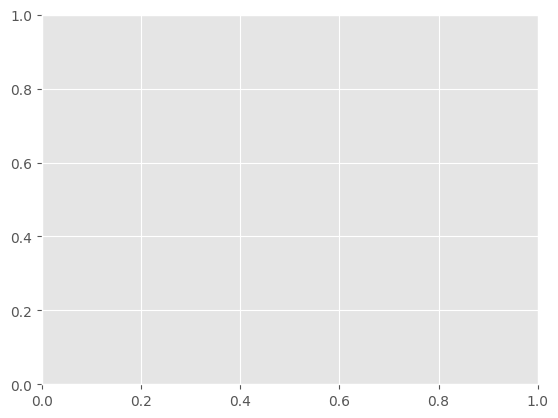

In [29]:

# plot the training loss and accuracy
N =EPOCHS
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0]


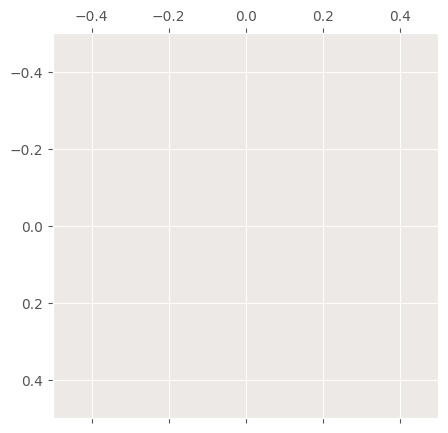

In [52]:
# cm = metrics.confusion_matrix(true_labels,prediction)
# sns.heatmap(cm/np.sum(cm),
#             annot=True,fmt='.2%',
#             cmap='Blues')
# plt.xlabel('Predicted Label',color='Red')
# plt.ylabel('True Label',color='Red')
conf_matrix = metrics.confusion_matrix(true_labels,prediction)
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
print(true_labels)
print(prediction)
# for i in range(conf_matrix.shape[0]):
#     for j in range(conf_matrix.shape[1]):
#         ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center',size='xx-large')
# plt.xlabel('Predictions', fontsize=18)
# plt.ylabel('Actuals', fontsize=18)
# plt.title('Confusion Matrix', fontsize=18)
# plt.show()
# con=metrics.confusion_matrix(true_labels,prediction )
# fig, ax = plot_confusion_matrix(con)
# plt.show()

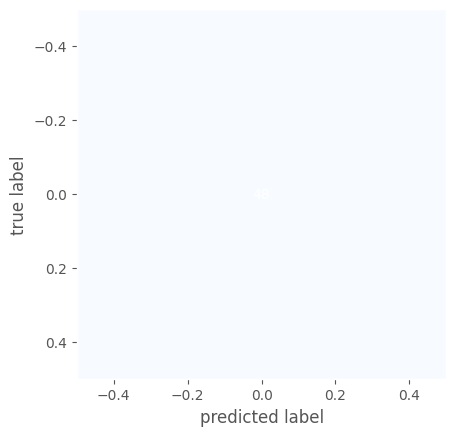

In [31]:
# this is the prediction for the test data set 

from sklearn import metrics
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt

con=metrics.confusion_matrix(true_labels,prediction )
fig, ax = plot_confusion_matrix(conf_mat=con)
plt.show()